In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 부러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

C:\Users\sage5\anaconda3\envs\tensorflow-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\sage5\anaconda3\envs\tensorflow-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [5]:
print(Y_train[0])

3


In [7]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 12s 128ms/step - loss: 2.5867 - accuracy: 0.3461 - val_loss: 2.4156 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 10s 112ms/step - loss: 2.1544 - accuracy: 0.4466 - val_loss: 1.9706 - val_accuracy: 0.5045
Epoch 3/20
90/90 [==============================] - 10s 112ms/step - loss: 1.8486 - accuracy: 0.5225 - val_loss: 1.8053 - val_accuracy: 0.5365
Epoch 4/20
90/90 [==============================] - 10s 108ms/step - loss: 1.7187 - accuracy: 0.5554 - val_loss: 1.7161 - val_accuracy: 0.5539
Epoch 5/20
90/90 [==============================] - 10s 111ms/step - loss: 1.6470 - accuracy: 0.5719 - val_loss: 1.6707 - val_accuracy: 0.5606
Epoch 6/20
90/90 [==============================] - 10s 108ms/step - loss: 1.5942 - accuracy: 0.5898 - val_loss: 1.5936 - val_accuracy: 0.6024
Epoch 7/20
90/90 [==============================] - 10s 107ms/step - loss: 1.5835 - accuracy: 0.5951 - val_loss: 1.6421 - val_accuracy: 0.5922

In [12]:
print("\n Test Accuracy:L %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 20ms/step - loss: 1.2318 - accuracy: 0.7021

 Test Accuracy:L 0.7021


In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

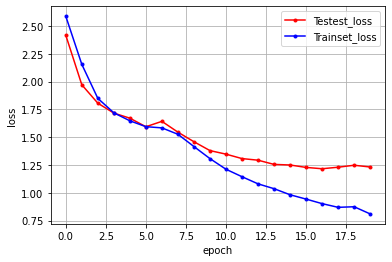

In [18]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testest_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()